# To build a classification methodology to determine whether a person makes over 50K per year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("data/incomeData.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.shape

(32561, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# EDA

In [6]:
data=data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [7]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [8]:
#handling categorical feature
for feature in data.select_dtypes(include='object').columns:
    print(feature,": ",data[feature].unique())

workclass :  ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education :  ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status :  ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation :  ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship :  ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race :  ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex :  ['Male' 'Female']
native-country :  ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Hondu

In [9]:
data.replace('?',np.NaN,inplace=True)

In [10]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64

In [11]:
data['workclass']=data['workclass'].fillna(data['workclass'].mode()[0])
data['occupation']=data['occupation'].fillna(data['occupation'].mode()[0])
data['native-country']=data['native-country'].fillna(data['native-country'].mode()[0])

In [12]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [13]:
numerical=data.select_dtypes(exclude='object').copy()
categorical=data.select_dtypes(include='object').copy()

In [14]:
categorical.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'Income'],
      dtype='object')

In [15]:
categorical['Income'] = categorical['Income'].map({'<=50K' : 0, '>50K' : 1})

In [16]:
categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0


E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

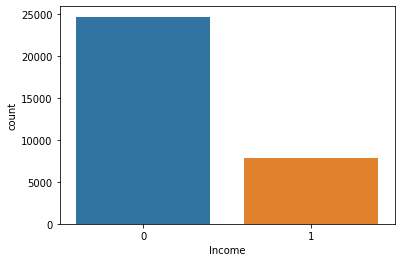

In [17]:
sns.countplot(categorical['Income'])

<AxesSubplot:xlabel='sex', ylabel='count'>

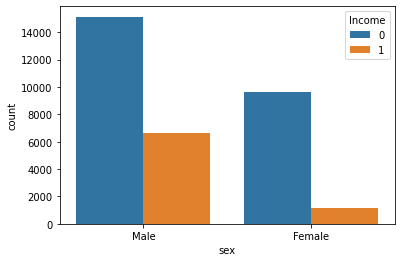

In [18]:
sns.countplot(data=categorical,x='sex',hue='Income')

<AxesSubplot:xlabel='count', ylabel='workclass'>

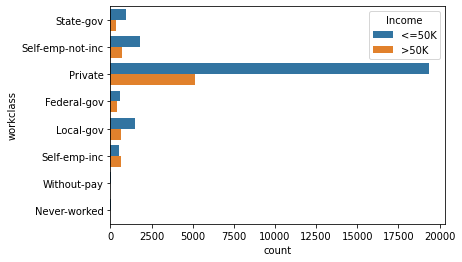

In [19]:
sns.countplot(data=data,y='workclass',hue='Income')

<AxesSubplot:xlabel='count', ylabel='education'>

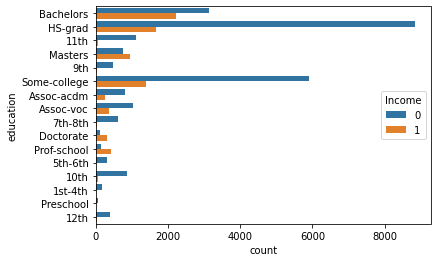

In [20]:
sns.countplot(data=categorical,y='education',hue='Income')

<AxesSubplot:xlabel='count', ylabel='marital-status'>

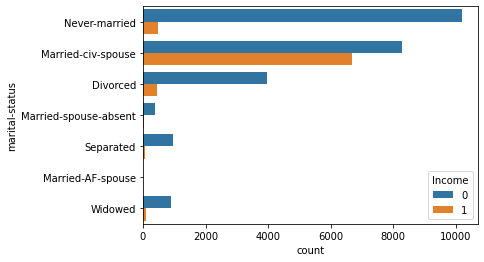

In [21]:
sns.countplot(data=categorical,y='marital-status',hue='Income')

<AxesSubplot:xlabel='count', ylabel='race'>

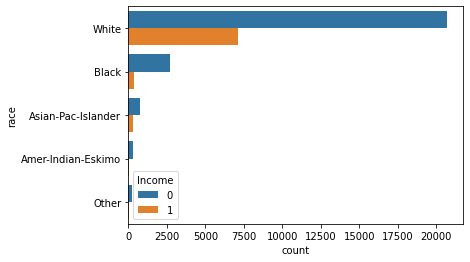

In [22]:
sns.countplot(data=categorical,y='race',hue='Income')

<AxesSubplot:xlabel='count', ylabel='occupation'>

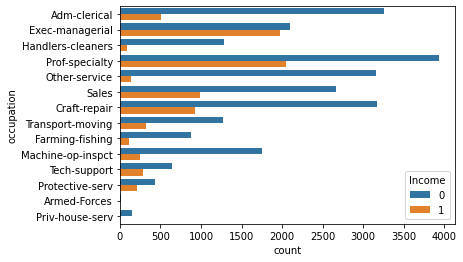

In [23]:
sns.countplot(data=categorical,y='occupation',hue='Income')

In [24]:
#handling numerical feature
numerical.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


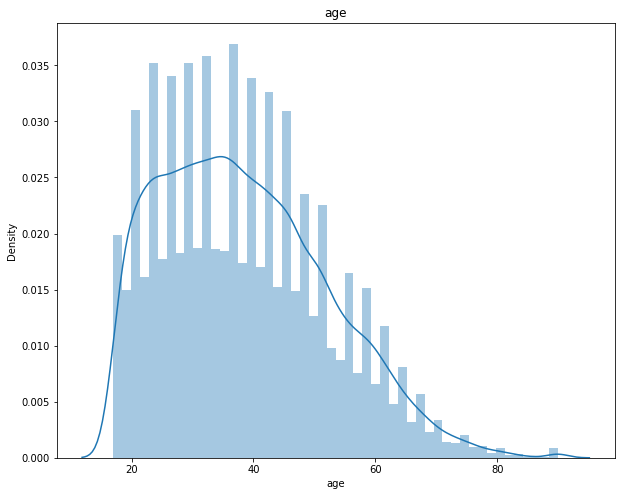

E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


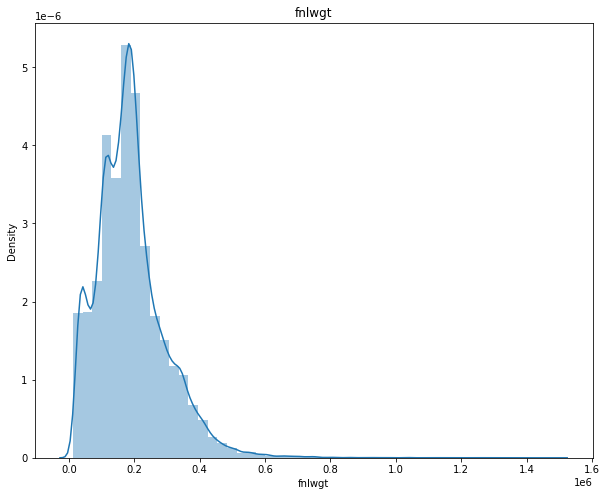

E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


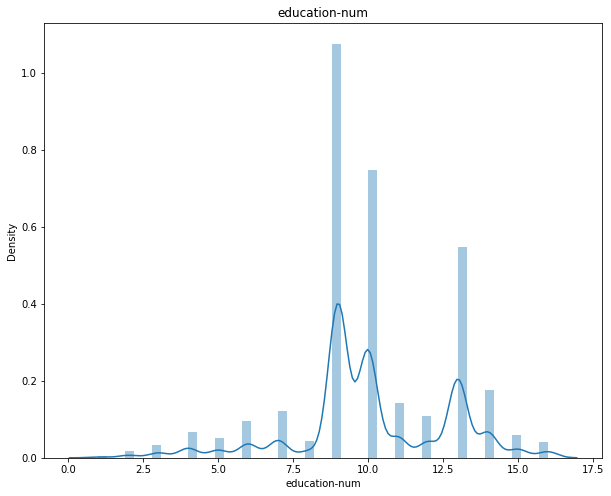

E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


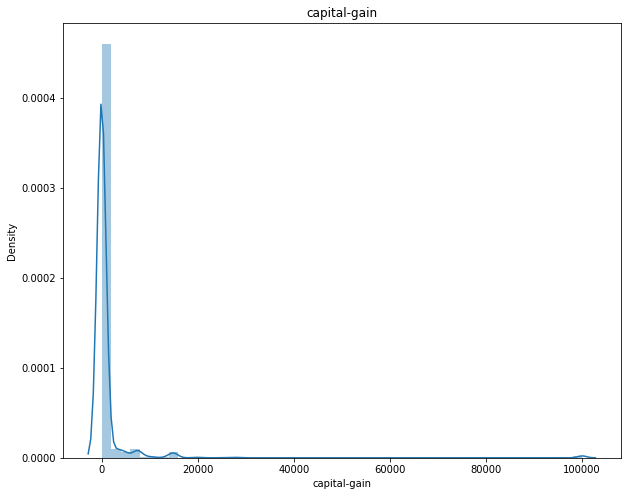

E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


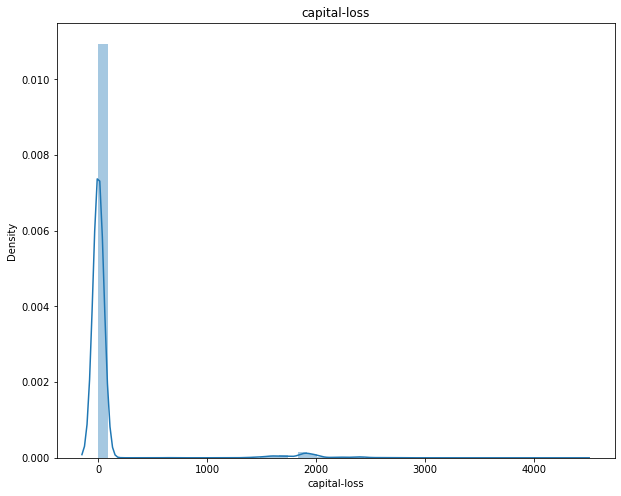

E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


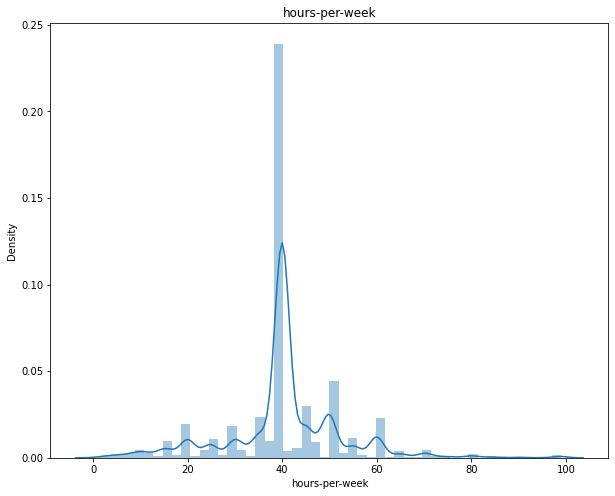

In [25]:
for feature in numerical.columns:
    plt.figure(figsize=(10,8))
    sns.distplot(numerical[feature])
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


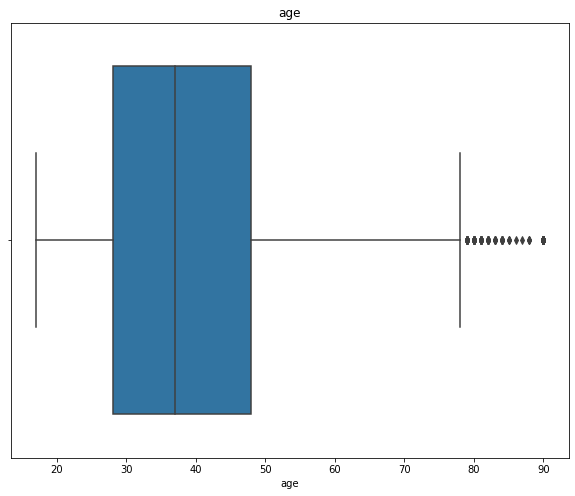

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


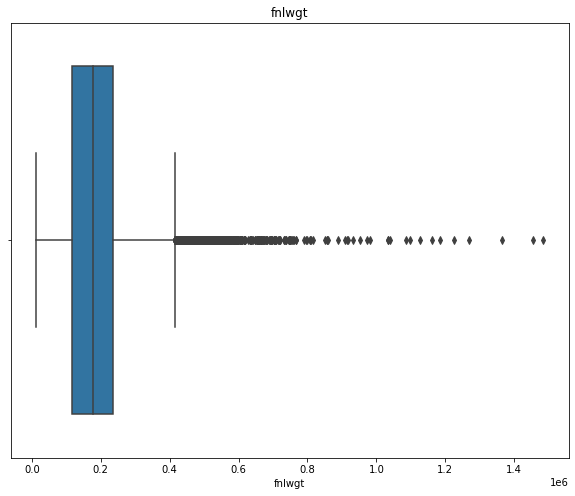

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


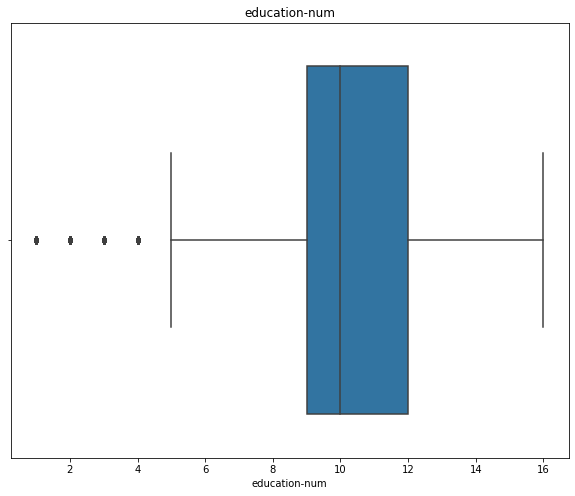

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


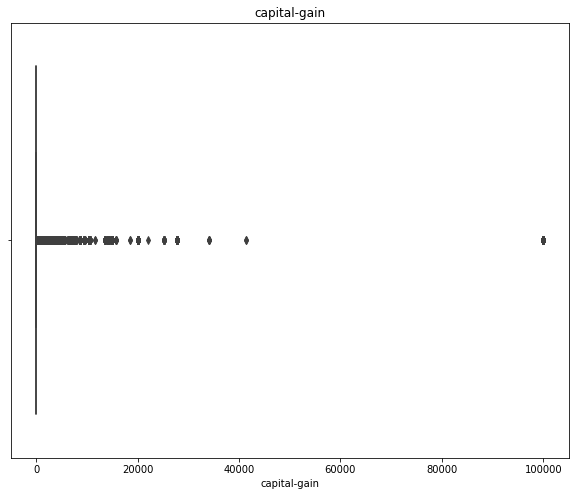

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


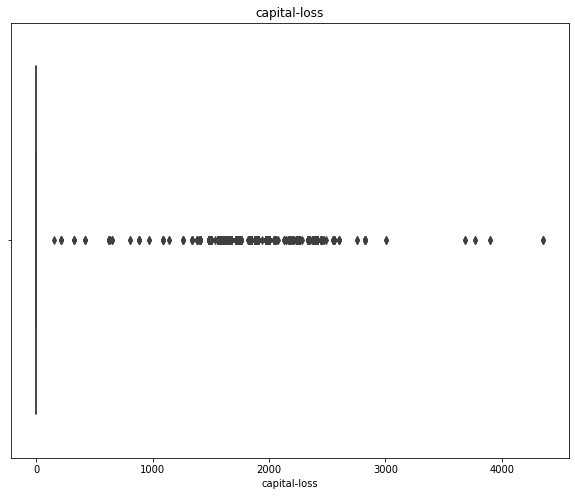

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


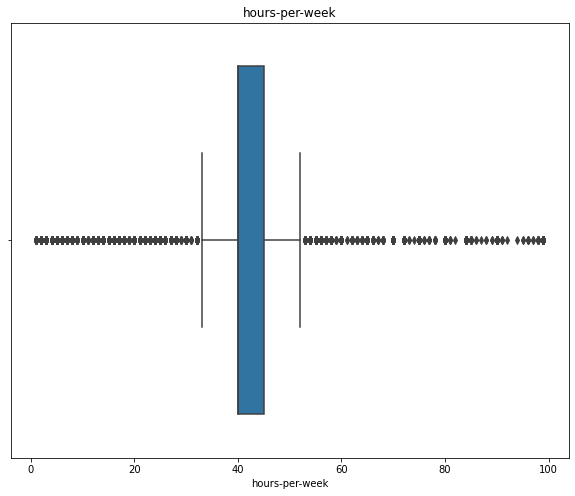

In [26]:
for feature in numerical.columns:
    plt.figure(figsize=(10,8))
    sns.boxplot(numerical[feature])
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [27]:
numerical.drop(['capital-gain','capital-loss'],axis=1,inplace=True)

In [28]:
#handling outliers
for feature in numerical.columns:
    IQR=numerical[feature].quantile(0.75)-numerical[feature].quantile(0.25)
    lower_bridge=numerical[feature].quantile(0.25)-(IQR*1.5)
    upper_bridge=numerical[feature].quantile(0.75)+(IQR*1.5)
    numerical.loc[numerical[feature]>=upper_bridge,feature]=upper_bridge
    numerical.loc[numerical[feature]<=lower_bridge,feature]=lower_bridge

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


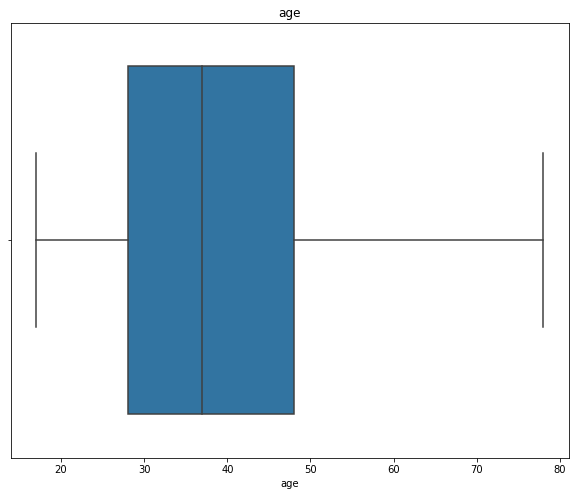

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


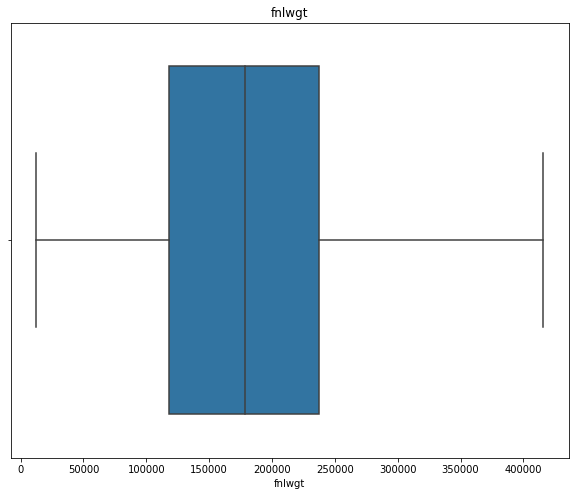

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


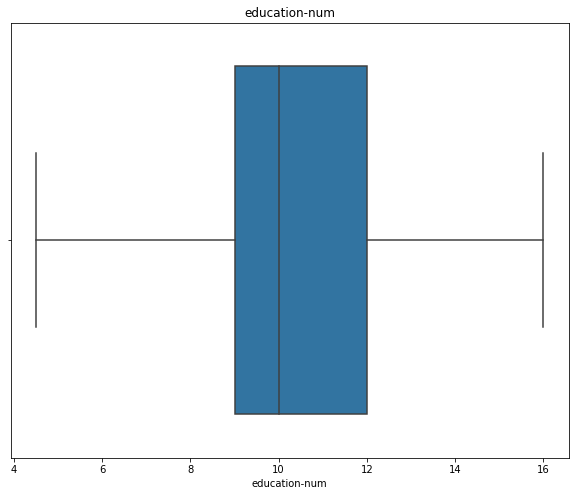

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


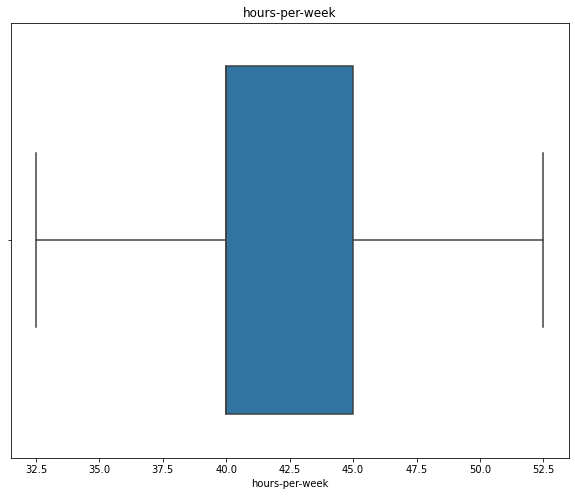

In [29]:
for feature in numerical.columns:
    plt.figure(figsize=(10,8))
    sns.boxplot(numerical[feature])
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [30]:

numerical.head()

,age,fnlwgt,education-num,hours-per-week
0,39.0,77516.0,13.0,40.0
1,50.0,83311.0,13.0,32.5
2,38.0,215646.0,9.0,40.0
3,53.0,234721.0,7.0,40.0
4,28.0,338409.0,13.0,40.0


In [31]:
categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0


In [32]:
categorical.drop(['education'],axis=1,inplace=True)

In [33]:
for feature in categorical:
    print(feature,": ",len(categorical[feature].unique()))

workclass :  8
marital-status :  7
occupation :  14
relationship :  6
race :  5
sex :  2
native-country :  41
Income :  2


In [34]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for feature in categorical.columns:
    categorical[feature]=encoder.fit_transform(categorical[feature])

In [35]:
categorical.head()

,workclass,marital-status,occupation,relationship,race,sex,native-country,Income
0,6,4,0,1,4,1,38,0
1,5,2,3,0,4,1,38,0
2,3,0,5,1,4,1,38,0
3,3,2,5,0,2,1,38,0
4,3,2,9,5,2,0,4,0


In [36]:
final=pd.concat([numerical,categorical],axis=1)

In [37]:
final.head()

,age,fnlwgt,education-num,hours-per-week,workclass,marital-status,occupation,relationship,race,sex,native-country,Income
0,39.0,77516.0,13.0,40.0,6,4,0,1,4,1,38,0
1,50.0,83311.0,13.0,32.5,5,2,3,0,4,1,38,0
2,38.0,215646.0,9.0,40.0,3,0,5,1,4,1,38,0
3,53.0,234721.0,7.0,40.0,3,2,5,0,2,1,38,0
4,28.0,338409.0,13.0,40.0,3,2,9,5,2,0,4,0


<AxesSubplot:>

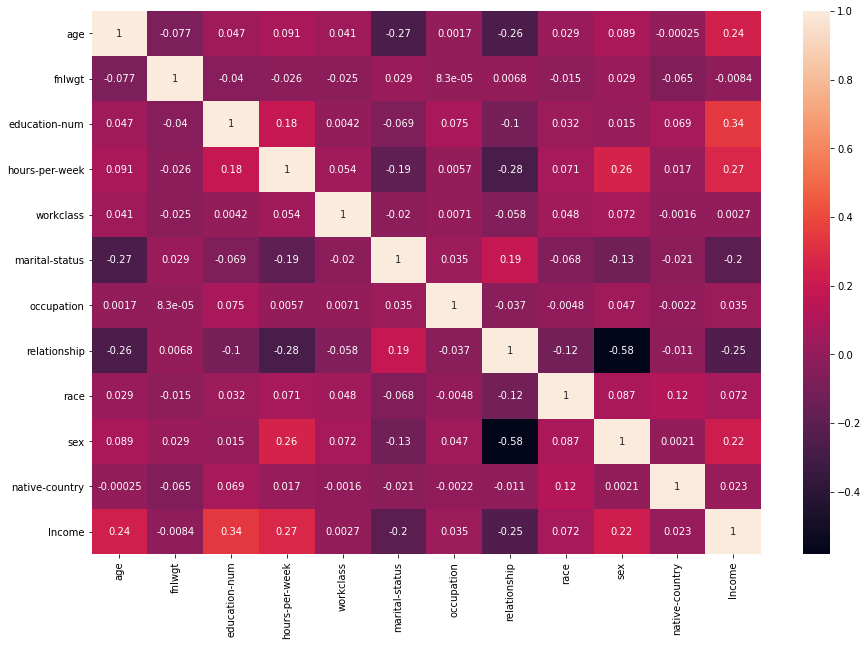

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(final.corr(),annot=True)

In [39]:
X=final.drop(['Income'],axis=1)
y=final['Income']

In [40]:
#Feature Selection
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [41]:
print(model.feature_importances_)

[0.17232754 0.19947537 0.1449277  0.0789891  0.0569002  0.08380361
 0.09438007 0.10801032 0.02273388 0.01825742 0.02019479]


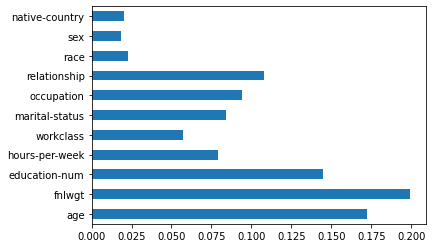

In [42]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_,index =X.columns)
feat_importances.plot(kind='barh')
plt.show()

In [43]:
#handling imbalanaced dataset
final['Income'].value_counts()

0    24720
1     7841
Name: Income, dtype: int64

(array([24720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7841.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

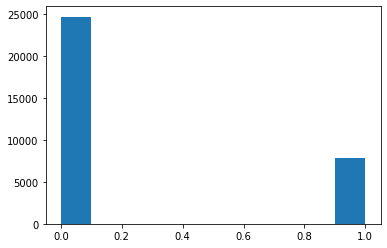

In [44]:
plt.hist(y)

In [45]:
from imblearn.over_sampling import RandomOverSampler
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(X,y)

(array([24720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 24720.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

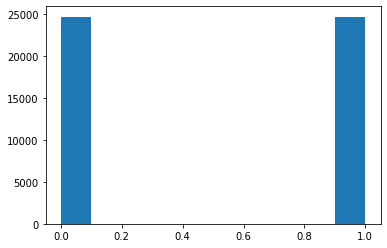

In [46]:
plt.hist(y_sampled)

In [47]:
##Model Building
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=0)
X_train.shape,X_test.shape

((39552, 11), (9888, 11))

# Model Building

In [48]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [49]:
#Random Forest Classifier
rf=RandomForestClassifier(max_depth=30)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=30)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[4293  713]
 [ 113 4769]]
0.9164644012944984
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      5006
           1       0.87      0.98      0.92      4882

    accuracy                           0.92      9888
   macro avg       0.92      0.92      0.92      9888
weighted avg       0.92      0.92      0.92      9888



In [51]:
#XGB Classifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

E:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:27:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8546723300970874

In [52]:
y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[4049  957]
 [ 480 4402]]
0.8546723300970874
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      5006
           1       0.82      0.90      0.86      4882

    accuracy                           0.85      9888
   macro avg       0.86      0.86      0.85      9888
weighted avg       0.86      0.85      0.85      9888



In [ ]:
#svm classifier
svc= SVC()
svc.fit(X_train,y_train)

In [54]:
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2373 2633]
 [2078 2804]]
0.5235639158576052
              precision    recall  f1-score   support

           0       0.53      0.47      0.50      5006
           1       0.52      0.57      0.54      4882

    accuracy                           0.52      9888
   macro avg       0.52      0.52      0.52      9888
weighted avg       0.52      0.52      0.52      9888



In [55]:
#logistic Regression
logistic= LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [56]:
y_pred = logistic.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3135 1871]
 [1688 3194]]
0.6400687702265372
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      5006
           1       0.63      0.65      0.64      4882

    accuracy                           0.64      9888
   macro avg       0.64      0.64      0.64      9888
weighted avg       0.64      0.64      0.64      9888



In [57]:
#GaussianNB
gb= GaussianNB()
gb.fit(X_train,y_train)

GaussianNB()

In [58]:
y_pred = gb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3455 1551]
 [ 993 3889]]
0.7427184466019418
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      5006
           1       0.71      0.80      0.75      4882

    accuracy                           0.74      9888
   macro avg       0.75      0.74      0.74      9888
weighted avg       0.75      0.74      0.74      9888



In [59]:
# KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [60]:
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2957 2049]
 [1033 3849]]
0.6883090614886731
              precision    recall  f1-score   support

           0       0.74      0.59      0.66      5006
           1       0.65      0.79      0.71      4882

    accuracy                           0.69      9888
   macro avg       0.70      0.69      0.69      9888
weighted avg       0.70      0.69      0.69      9888

